<a href="https://colab.research.google.com/github/KijoSal-dev/AI-ethics-wk7/blob/main/wk7prt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Disparate Impact: 0.8404
False Positive Rate (Privileged - Caucasian): 0.0000
False Positive Rate (Unprivileged - African-American): 0.0000
False Positive Rate Difference: 0.0000


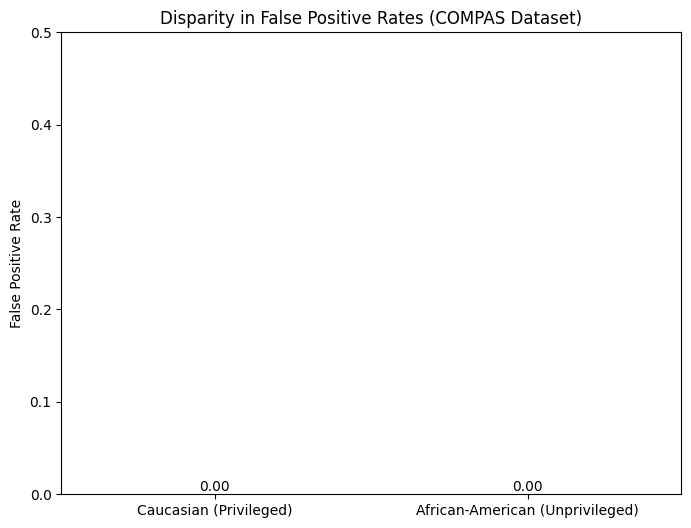

In [4]:
# Install necessary libraries
# pip install aif360
# pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from aif360.datasets import CompasDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric

def run_compas_audit():
    """
    Performs a bias audit on the COMPAS dataset using AI Fairness 360.
    """
    # Load the COMPAS dataset from AIF360
    # The dataset is preprocessed by AIF360
    dataset = CompasDataset()

    # Define the protected attribute (race) and the privileged/unprivileged groups
    # In this dataset, 'Caucasian' is considered the privileged group,
    # and 'African-American' is the unprivileged group.
    privileged_groups = [{'race': 1}]
    unprivileged_groups = [{'race': 0}]

    # Create a metric object to calculate fairness metrics on the dataset
    metric_dataset = BinaryLabelDatasetMetric(dataset,
                                              unprivileged_groups=unprivileged_groups,
                                              privileged_groups=privileged_groups)

    # --- 1. Disparate Impact ---
    # This metric measures the ratio of the rate of favorable outcomes for the
    # unprivileged group to the rate of favorable outcomes for the privileged group.
    # A value less than 1 suggests a disadvantage for the unprivileged group.
    disparate_impact = metric_dataset.disparate_impact()
    print(f"Disparate Impact: {disparate_impact:.4f}")

    # --- 2. False Positive Rate Disparity ---
    # We will now look at the model's predictions (the 'decile_score' in the
    # original dataset is treated as a prediction).
    # AIF360 can create a dataset with predictions.
    dataset_pred = dataset.copy(deepcopy=True)
    # For this example, we'll use a simple threshold on the decile score
    # to create a binary prediction.
    dataset_pred.scores = (dataset.scores >= 7).astype(float).reshape(-1, 1)


    # Create a classification metric object
    metric_pred = ClassificationMetric(dataset,
                                       dataset_pred,
                                       unprivileged_groups=unprivileged_groups,
                                       privileged_groups=privileged_groups)

    # Calculate False Positive Rate for both groups
    fpr_unprivileged = metric_pred.false_positive_rate_difference()
    fpr_privileged = metric_pred.false_positive_rate(privileged=True)
    fpr_unprivileged_val = metric_pred.false_positive_rate(privileged=False)


    print(f"False Positive Rate (Privileged - Caucasian): {fpr_privileged:.4f}")
    print(f"False Positive Rate (Unprivileged - African-American): {fpr_unprivileged_val:.4f}")
    print(f"False Positive Rate Difference: {fpr_unprivileged:.4f}")


    # --- 3. Visualization ---
    # Create a bar chart to visualize the False Positive Rates
    labels = ['Caucasian (Privileged)', 'African-American (Unprivileged)']
    fpr_values = [fpr_privileged, fpr_unprivileged_val]

    plt.figure(figsize=(8, 6))
    bars = plt.bar(labels, fpr_values, color=['#007bff', '#dc3545'])
    plt.ylabel('False Positive Rate')
    plt.title('Disparity in False Positive Rates (COMPAS Dataset)')
    plt.ylim(0, 0.5)

    # Add values on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center')

    plt.show()

if __name__ == '__main__':
    run_compas_audit()
